# MNIS

## 0~9 손으로 쓰여진 데이터
## Training set 60000(image + lables)
## Test set 10000(image + lables)

## MNIS data set  
### - 28 × 28  image
### - 1 channel gray image
### - 0 ~ 9 digits
### view(-1. 28*28)

## trochvision 
### 토치비젼은 유명한 데이터셋, 모델 아키테쳐, 데이터 트랜스폼, 데이터 쉽게 읽을 수 있도록 utils를 제공



In [1]:
# Lab 7 Learning rate and Evaluation
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproduciblility
random.seed(777)
torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [3]:
# parameters
training_epochs = 15
batch_size = 100

In [7]:
# MNIST dataset
mnist_train = dsets.MNIST(root = 'MNIST_data/',
                         train = True,
                         transform = transforms.ToTensor(),
                         download = True)
mnist_test = dsets.MNIST(root = 'MNIST_data/',
                         train = False,
                         transform = transforms.ToTensor(),
                         download = True)

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw



Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...


C:\Users\MY\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [8]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset = mnist_train,
                                          batch_size = batch_size,
                                          shuffle = True,
                                          drop_last=True)

In [9]:
# MNIST dat image of shape 28 *28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [10]:
# define cost/loss & optimzer
criterion = torch.nn.CrossEntropyLoss().to(device) # Softmax is internall computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [11]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    
    for X, Y in data_loader:
        #reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 *28).to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost/ total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning finished')

Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180703
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417054
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277809024
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learning finished


## Test

In [14]:
# Test the model using test sets
with torch.no_grad(): #grad사용 안함
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accurancy = correct_prediction.float().mean()
    print("Accurancy: ", accurancy.item())

Accurancy:  0.8862999677658081


## Visualization

Label:  3
Prediction:  3


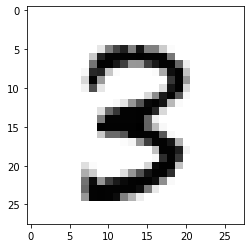

In [19]:
import matplotlib.pyplot as plt
import random

r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r: r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r+1].to(device)

print("Label: ", Y_single_data.item())
single_prediction = linear(X_single_data)
print("Prediction: ", torch.argmax(single_prediction,1).item())

plt.imshow(mnist_test.test_data[r:r + 1].view(28,28),
          cmap = "Greys", interpolation = "nearest")
plt.show()